In [1]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


 Reading the dataset

In [2]:
df = pd.read_excel("DoctorVisits.xlsx")
df

,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,1,female,0.19,0.55,1,4,1,yes,no,no,no,no
1,2,1,female,0.19,0.45,1,2,1,yes,no,no,no,no
2,3,1,male,0.19,0.90,3,0,0,no,no,no,no,no
3,4,1,male,0.19,0.15,1,0,0,no,no,no,no,no
4,5,1,male,0.19,0.45,2,5,1,no,no,no,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5185,5186,0,female,0.22,0.55,0,0,0,no,no,no,no,no
5186,5187,0,male,0.27,1.30,0,0,1,no,no,no,no,no
5187,5188,0,female,0.37,0.25,1,0,1,no,no,yes,no,no
5188,5189,0,female,0.52,0.65,0,0,0,no,no,no,no,no


In [3]:
df.head()

,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,1,female,0.19,0.55,1,4,1,yes,no,no,no,no
1,2,1,female,0.19,0.45,1,2,1,yes,no,no,no,no
2,3,1,male,0.19,0.90,3,0,0,no,no,no,no,no
3,4,1,male,0.19,0.15,1,0,0,no,no,no,no,no
4,5,1,male,0.19,0.45,2,5,1,no,no,no,yes,no


In [4]:
print (df.head(15))

    Unnamed: 0  visits  gender   age  income  illness  reduced  health  \
0            1       1  female  0.19    0.55        1        4       1   
1            2       1  female  0.19    0.45        1        2       1   
2            3       1    male  0.19    0.90        3        0       0   
3            4       1    male  0.19    0.15        1        0       0   
4            5       1    male  0.19    0.45        2        5       1   
5            6       1  female  0.19    0.35        5        1       9   
6            7       1  female  0.19    0.55        4        0       2   
7            8       1  female  0.19    0.15        3        0       6   
8            9       1  female  0.19    0.65        2        0       5   
9           10       1    male  0.19    0.15        1        0       0   
10          11       1    male  0.19    0.45        1        0       0   
11          12       1    male  0.19    0.25        2        0       2   
12          13       2    male  0.19  

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5190 entries, 0 to 5189
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5190 non-null   int64  
 1   visits      5190 non-null   int64  
 2   gender      5190 non-null   object 
 3   age         5190 non-null   float64
 4   income      5190 non-null   float64
 5   illness     5190 non-null   int64  
 6   reduced     5190 non-null   int64  
 7   health      5190 non-null   int64  
 8   private     5190 non-null   object 
 9   freepoor    5190 non-null   object 
 10  freerepat   5190 non-null   object 
 11  nchronic    5190 non-null   object 
 12  lchronic    5190 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 527.2+ KB


In [6]:
nunique = df.nunique()
nunique
# unique values in the data sets

Unnamed: 0    5190
visits          10
gender           2
age             12
income          14
illness          6
reduced         15
health          13
private          2
freepoor         2
freerepat        2
nchronic         2
lchronic         2
dtype: int64

# Droping null values from data sets 

In [7]:
df = df.dropna('columns')


In [8]:
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 5190 rows and 13 columns


# As the age is divided by 100 and stored in decimals.

In [9]:
df["age"]=df["age"]*100
#as the age is divided by 100 and stored in decimals.
df

,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,1,female,19.0,0.55,1,4,1,yes,no,no,no,no
1,2,1,female,19.0,0.45,1,2,1,yes,no,no,no,no
2,3,1,male,19.0,0.90,3,0,0,no,no,no,no,no
3,4,1,male,19.0,0.15,1,0,0,no,no,no,no,no
4,5,1,male,19.0,0.45,2,5,1,no,no,no,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5185,5186,0,female,22.0,0.55,0,0,0,no,no,no,no,no
5186,5187,0,male,27.0,1.30,0,0,1,no,no,no,no,no
5187,5188,0,female,37.0,0.25,1,0,1,no,no,yes,no,no
5188,5189,0,female,52.0,0.65,0,0,0,no,no,no,no,no


# Income is recorded in fractions changing the income of all by multiplying with 10000

In [10]:
df["income"] = df["income"]*10000
df

,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,1,female,19.0,5500.0,1,4,1,yes,no,no,no,no
1,2,1,female,19.0,4500.0,1,2,1,yes,no,no,no,no
2,3,1,male,19.0,9000.0,3,0,0,no,no,no,no,no
3,4,1,male,19.0,1500.0,1,0,0,no,no,no,no,no
4,5,1,male,19.0,4500.0,2,5,1,no,no,no,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5185,5186,0,female,22.0,5500.0,0,0,0,no,no,no,no,no
5186,5187,0,male,27.0,13000.0,0,0,1,no,no,no,no,no
5187,5188,0,female,37.0,2500.0,1,0,1,no,no,yes,no,no
5188,5189,0,female,52.0,6500.0,0,0,0,no,no,no,no,no


# Counting values 

In [11]:
df["visits"].value_counts()


0    4141
1     782
2     174
3      30
4      24
6      12
7      12
5       9
8       5
9       1
Name: visits, dtype: int64

copying original dataframe into another one to delete the rows from the dataset which have 0 visits and droping those rows

In [12]:
df1 = df.copy() 

df1.drop(df1[df1["visits"] == 0].index, inplace = True)
df1    

,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,1,female,19.0,5500.0,1,4,1,yes,no,no,no,no
1,2,1,female,19.0,4500.0,1,2,1,yes,no,no,no,no
2,3,1,male,19.0,9000.0,3,0,0,no,no,no,no,no
3,4,1,male,19.0,1500.0,1,0,0,no,no,no,no,no
4,5,1,male,19.0,4500.0,2,5,1,no,no,no,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,1045,2,female,72.0,2500.0,0,0,0,no,no,yes,no,no
1045,1046,1,female,72.0,2500.0,0,0,0,no,no,yes,no,yes
1046,1047,1,male,72.0,2500.0,0,0,1,no,no,yes,no,no
1047,1048,1,male,72.0,2500.0,0,0,2,no,no,yes,yes,no


In [13]:
df["nchronic"].value_counts()


no     3098
yes    2092
Name: nchronic, dtype: int64

gender,age,income,illness,reduced,private,freepoor,freerepat columns value counts

In [14]:
df["gender"].value_counts()

female    2702
male      2488
Name: gender, dtype: int64

In [15]:
df["age"].value_counts()

22.0    1213
72.0     822
19.0     752
27.0     523
62.0     316
67.0     315
32.0     301
57.0     273
52.0     222
47.0     181
37.0     146
42.0     126
Name: age, dtype: int64

In [16]:
df["income"].value_counts()

2500.0     1195
9000.0      589
5500.0      467
3500.0      462
6500.0      455
7500.0      441
4500.0      400
11000.0     361
1500.0      249
15000.0     215
13000.0     162
600.0        80
0.0          79
100.0        35
Name: income, dtype: int64

In [17]:
df["illness"].value_counts()

1    1638
0    1554
2     946
3     542
4     274
5     236
Name: illness, dtype: int64

In [18]:
df["reduced"].value_counts()

0     4454
14     188
1      177
2      108
3       74
4       45
5       40
7       38
8       17
6       17
10      12
9        7
12       6
13       5
11       2
Name: reduced, dtype: int64

In [19]:
df["private"].value_counts()

no     2892
yes    2298
Name: private, dtype: int64

In [20]:
df["freepoor"].value_counts()

no     4968
yes     222
Name: freepoor, dtype: int64

In [21]:
df["freerepat"].value_counts()

no     4099
yes    1091
Name: freerepat, dtype: int64

values count may differ in df1 from df since df1 is modified as rows whoes visits are 0 had been deleted/droped from the dataset

In [22]:
df1["freerepat"].value_counts()

no     704
yes    345
Name: freerepat, dtype: int64

# ploting a graph which states the population of male and female patients 

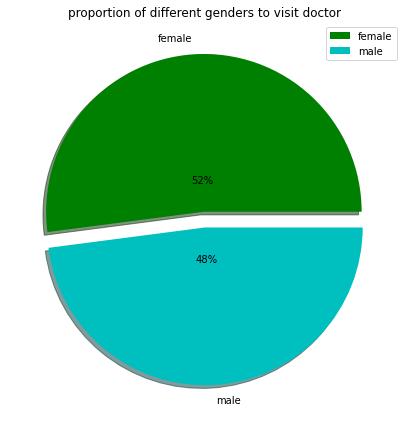

In [23]:
df
plt.figure(figsize = (50,6))
plt.pie(x=df["gender"].value_counts(),autopct='%1.0f%%',pctdistance=0.2,explode=[0.05,0.05],labels = ['female','male'],
        colors = ['g','c'],shadow = 'True')

plt.title('proportion of different genders to visit doctor')
plt.legend()
plt.tight_layout()
plt.show()


This is the visual representation of the patients gender in dataset df1

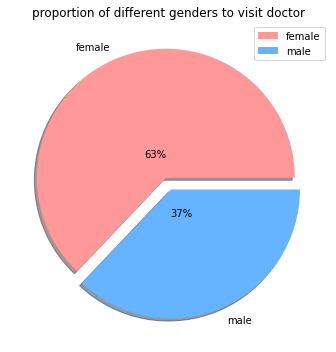

In [24]:
#ploting a graph which states the population of male and female patients 
df1
plt.figure(figsize = (20,5))
colors = ['#ff9999','#66b3ff']

plt.pie(x = df1["gender"].value_counts(),autopct='%1.0f%%',pctdistance=0.2,explode=[0.05,0.05],labels = ['female','male'], 
       colors=colors,shadow = 'True')
#here autopct is used to display the percentage value using string formatting.

plt.title('proportion of different genders to visit doctor')#title of the graph
plt.legend()#to automatically update values when a row is deleted or added to the data set 
plt.tight_layout()
plt.show()


visualizing income in a box plot

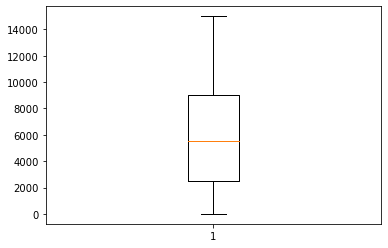

In [25]:
df
y = list(df.income)
plt.boxplot(y)
plt.show()

relation between reduced and income of the patients

Text(0, 0.5, 'reduced')

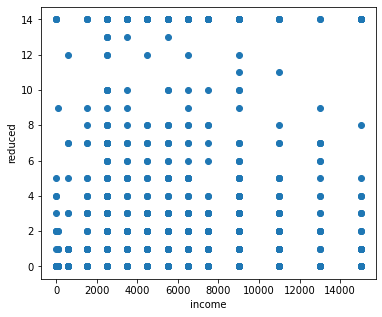

In [26]:
plt.figure(figsize=(6,5))
plt.scatter(x = 'income',y = 'reduced',data=df)
plt.xlabel('income')
plt.ylabel('reduced')


count of patients of particular age who visists doctor

<AxesSubplot:xlabel='age', ylabel='Count'>

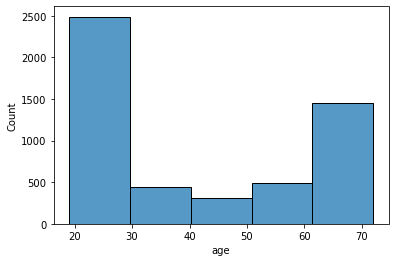

In [27]:
sns.histplot(df.age,bins=5)

In [28]:
label = ['yes','no']
y = df

finding correlation between variables using seabron's heatmap

<AxesSubplot:>

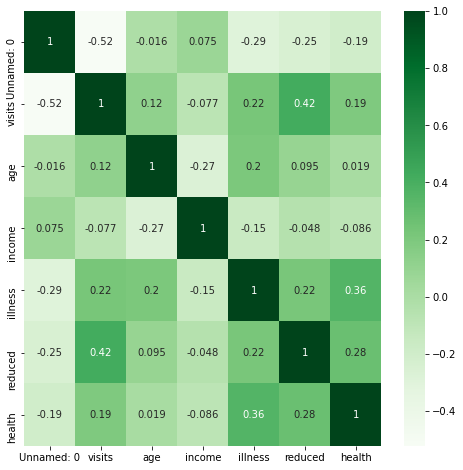

In [34]:
plt.figure(figsize = (8,8))
sns.heatmap(df.corr(),cbar = True ,annot = True ,cmap = 'Greens')

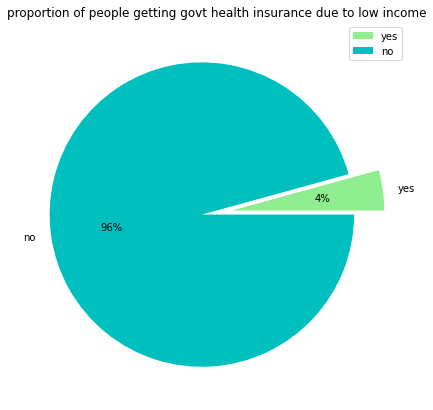

In [91]:
label = ['yes','no']
y = df[df['freepoor']=='yes']
x = df[df['freepoor']=='no']
n = [y.shape[0],x.shape[0]]
plt.figure(figsize=(7,7))
plt.pie(n,labels=label,colors = ['lightgreen','c'],autopct='%1.0f%%',explode=[0.10,0.10])
plt.title('proportion of people getting govt health insurance due to low income')
plt.legend()
plt.show()

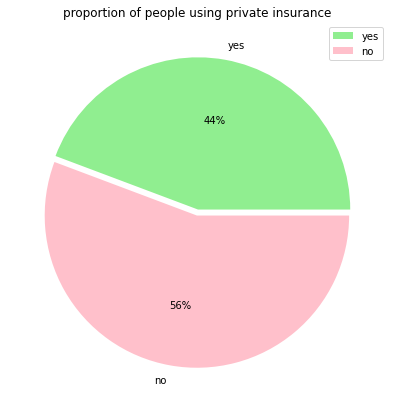

In [93]:
label = ['yes','no']
y = df[df['private']=='yes']
x = df[df['private']=='no']
n = [y.shape[0],x.shape[0]]
plt.figure(figsize=(7,7))
plt.pie(n,labels=label,colors = ['lightgreen','pink'],autopct='%1.0f%%',explode = [0.02,0.02])
plt.title('proportion of people using private insurance')
plt.legend()
plt.show()

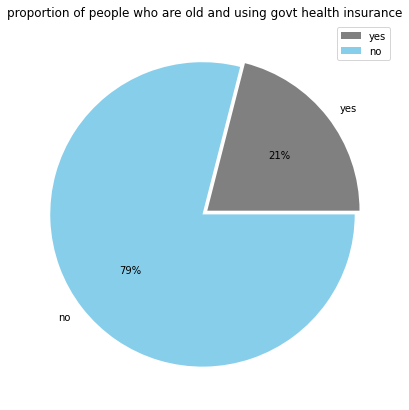

In [97]:
label = ['yes','no']
y = df[df['freerepat']=='yes']
x = df[df['freerepat']=='no']
n = [y.shape[0],x.shape[0]]
plt.figure(figsize=(7,7))
plt.pie(n,labels=label,colors = ['grey','skyblue'],autopct='%1.0f%%',explode = [0.02,0.02])
plt.title('proportion of people who are old and using govt health insurance')
plt.legend()
plt.show()

ploting a bar graph to analyze no of people who have health insurance and are suffuring from nchronic

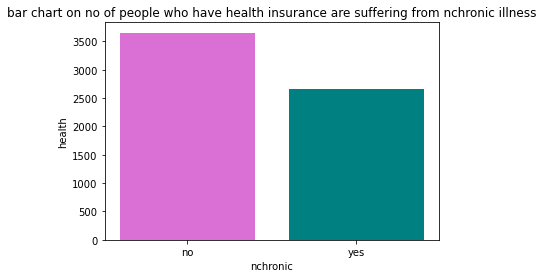

In [127]:
df2 = df.groupby('nchronic')['health'].sum().to_frame().reset_index()
plt.bar(df2['nchronic'],df2['health'],color = ['orchid','teal'])
plt.title('bar chart on no of people who have health insurance are suffering from nchronic illness')
plt.xlabel('nchronic')
plt.ylabel('health')
plt.show()

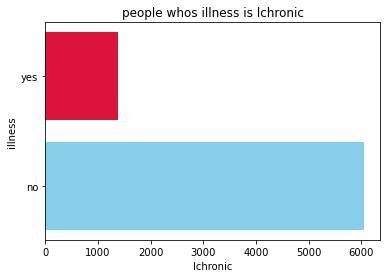

In [128]:
df2 = df.groupby('lchronic')['illness'].sum().to_frame().reset_index()
plt.barh(df2['lchronic'],df2['illness'],color = ['skyblue','crimson'])
plt.title('people whos illness is lchronic')
plt.xlabel('lchronic')
plt.ylabel('illness')
plt.show()

using a heat map to display null value using seabrom

<AxesSubplot:>

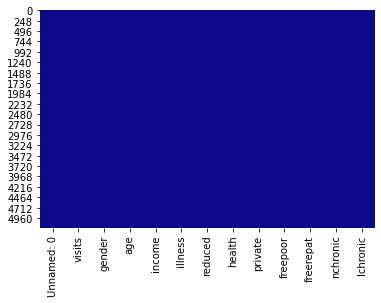

In [139]:
sns.heatmap(df.isnull(),cbar = False,cmap = 'plasma')